## Gerekli Kutuphanelerin Yuklenmesi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import Yusuf2
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### Verileri Yukleyelim

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train_data.shape, test_data.shape

((136950, 6), (27375, 5))

### train ile test verisini birleştirip işlem yapalım

In [4]:
df = train_data.append(test_data)

In [5]:
df

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63.0
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66.0
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9.0
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59.0
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49.0
...,...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,NaN
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,NaN
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,NaN
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,NaN


### Verileri inceleyelim

In [6]:
df.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63.0
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66.0
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9.0
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59.0
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164325 entries, 0 to 27374
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        164325 non-null  int64  
 1   date      164325 non-null  object 
 2   country   164325 non-null  object 
 3   store     164325 non-null  object 
 4   product   164325 non-null  object 
 5   num_sold  136950 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 8.8+ MB


In [8]:
df.isnull().sum()

id              0
date            0
country         0
store           0
product         0
num_sold    27375
dtype: int64

In [9]:
df.describe(include = object)

,date,country,store,product
count,164325,164325,164325,164325
unique,2191,5,3,5
top,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
freq,75,32865,54775,32865


### Sutunlari Duzenleyelim

In [10]:
df.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

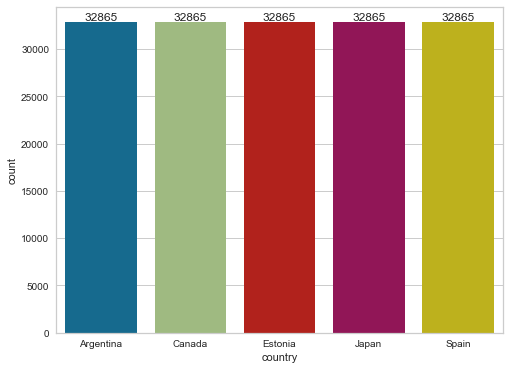

In [11]:
plt.figure(figsize = (8, 6))
ax = sbn.countplot(x = df["country"])
ax.bar_label(ax.containers[0]);

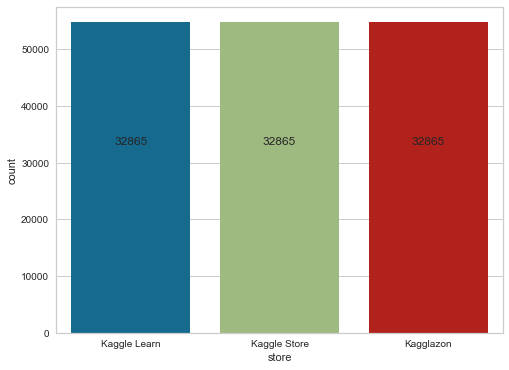

In [12]:
plt.figure(figsize = (8, 6))
bx = sbn.countplot(x = df["store"])
bx.bar_label(ax.containers[0]);

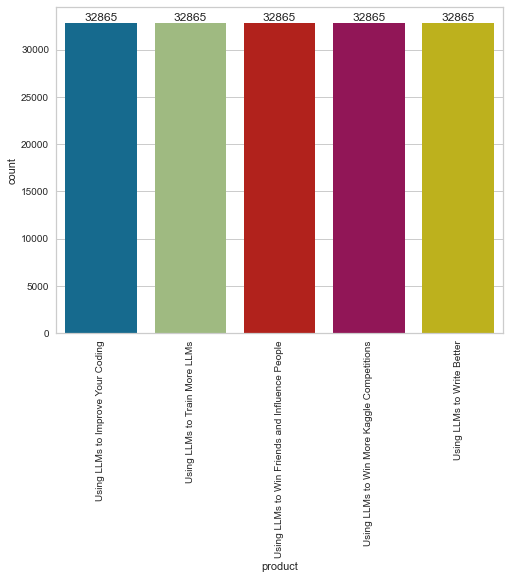

In [13]:
plt.figure(figsize = (8, 6))
cx = sbn.countplot(x = df["product"])
cx.bar_label(ax.containers[0]);
plt.xticks(rotation = 90);

### id sutununu silelim

In [14]:
del df['id']

### Date sutunu kullanarak ay ve yıl sutunlarını olusturalım

In [15]:
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

In [16]:
df.drop('date', axis = 1, inplace = True)

In [17]:
df

,country,store,product,num_sold,year,month
0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63.0,2017,1
1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66.0,2017,1
2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9.0,2017,1
3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59.0,2017,1
4,Argentina,Kaggle Learn,Using LLMs to Write Better,49.0,2017,1
...,...,...,...,...,...,...
27370,Spain,Kagglazon,Using LLMs to Improve Your Coding,NaN,2022,12
27371,Spain,Kagglazon,Using LLMs to Train More LLMs,NaN,2022,12
27372,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,NaN,2022,12
27373,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,NaN,2022,12


### Train ile test verisini ayıralım

In [18]:
train = df.iloc[:136950]
train

,country,store,product,num_sold,year,month
0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63.0,2017,1
1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66.0,2017,1
2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9.0,2017,1
3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59.0,2017,1
4,Argentina,Kaggle Learn,Using LLMs to Write Better,49.0,2017,1
...,...,...,...,...,...,...
136945,Spain,Kagglazon,Using LLMs to Improve Your Coding,700.0,2021,12
136946,Spain,Kagglazon,Using LLMs to Train More LLMs,752.0,2021,12
136947,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111.0,2021,12
136948,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641.0,2021,12


In [19]:
test = df.iloc[136950:]
test

,country,store,product,num_sold,year,month
0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,NaN,2022,1
1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,NaN,2022,1
2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,NaN,2022,1
3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,NaN,2022,1
4,Argentina,Kaggle Learn,Using LLMs to Write Better,NaN,2022,1
...,...,...,...,...,...,...
27370,Spain,Kagglazon,Using LLMs to Improve Your Coding,NaN,2022,12
27371,Spain,Kagglazon,Using LLMs to Train More LLMs,NaN,2022,12
27372,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,NaN,2022,12
27373,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,NaN,2022,12


###  makine öğrenmesi algoritmalarının skorlarına bakalım.

In [20]:
x = train.drop('num_sold', axis = 1)[:100]
y = train['num_sold'][:100]

In [21]:
x = pd.get_dummies(x, drop_first = True)

In [22]:
x

,year,month,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better
0,2017,1,0,0,0,0,1,0,0,0,0,0
1,2017,1,0,0,0,0,1,0,1,0,0,0
2,2017,1,0,0,0,0,1,0,0,1,0,0
3,2017,1,0,0,0,0,1,0,0,0,1,0
4,2017,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017,1,1,0,0,0,0,1,0,0,0,0
96,2017,1,1,0,0,0,0,1,1,0,0,0
97,2017,1,1,0,0,0,0,1,0,1,0,0
98,2017,1,1,0,0,0,0,1,0,0,1,0


In [23]:
y

0      63.0
1      66.0
2       9.0
3      59.0
4      49.0
      ...  
95    253.0
96    240.0
97     46.0
98    252.0
99    205.0
Name: num_sold, Length: 100, dtype: float64

In [24]:
def regresyon(x, y):
    lin = LinearRegression()
    rid = Ridge()
    las = Lasso()
    ela = ElasticNet()
    sup = SVR()
    ran = RandomForestRegressor()
    dec = DecisionTreeRegressor()
        
    models = [lin, rid, las, ela, sup, ran, dec]
    model_names = ["Linear_R", "Ridge", "Lasso", "Elastic", "Support", "Random", "Decision_T"]
        
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
        
    r2 = []
        
    skor = pd.DataFrame(columns = ["R2_Score"], index = model_names)
        
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2.append(r2_score(y_true, y_pred) * 100)
        
            
    skor["R2_Score"] = r2

    return skor.sort_values('R2_Score', ascending = False)


    #print(skor.sort_values('R2_Score', ascending = False))
        
    #plt.figure(figsize=(10, 6))
        
    #sbn.barplot(data = skor, y ='R2_Score', x = skor.index, color = 'lightblue')
    #for i, v in enumerate(skor['R2_Score']):
    #    plt.text(i, v, str(round(v, 2)), color='black', ha='center')
    #plt.xlabel('R2_Score')
    #plt.ylabel('Models')
    #plt.title('R2_Score of Regression Models')
    #plt.show()

In [25]:
regresyon(x, y)

,R2_Score
Random,89.092005
Decision_T,87.981770
Lasso,61.293552
Ridge,60.989192
Linear_R,59.473548
Elastic,46.930822
Support,-1.808850


### Şimdi de Derin Öğrenme modelinin skoruna bakalım.

In [26]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [27]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
#x_train = MinMaxScaler().fit_transform(x_train)
#x_test = MinMaxScaler().fit_transform(x_test)

In [28]:
model = Sequential()
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 128, activation = 'relu'))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 1, activation = 'relu'))

model.compile(optimizer = 'adamax', loss = 'mse')

In [29]:
erken_durma = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min')

In [30]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_true), 
                    verbose = 1, batch_size = 32, epochs = 10, callbacks = [erken_durma])

Epoch 1/10
3/3 [==============================] - 3s 192ms/step - loss: 131750.8906 - val_loss: 73069.1484
Epoch 2/10
3/3 [==============================] - 0s 30ms/step - loss: 131750.5312 - val_loss: 73065.8594
Epoch 3/10
3/3 [==============================] - 0s 30ms/step - loss: 131740.9844 - val_loss: 73035.2969
Epoch 4/10
3/3 [==============================] - 0s 31ms/step - loss: 131699.5938 - val_loss: 72987.7031
Epoch 5/10
3/3 [==============================] - 0s 31ms/step - loss: 131629.5312 - val_loss: 72903.1094
Epoch 6/10
3/3 [==============================] - 0s 33ms/step - loss: 131494.7812 - val_loss: 72749.7500
Epoch 7/10
3/3 [==============================] - 0s 37ms/step - loss: 131251.1250 - val_loss: 72468.7969
Epoch 8/10
3/3 [==============================] - 0s 42ms/step - loss: 130792.4609 - val_loss: 71964.8281
Epoch 9/10
3/3 [==============================] - 0s 42ms/step - loss: 130021.8516 - val_loss: 71064.9219
Epoch 10/10
3/3 [============================

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                650       
                                                                 
 dense_1 (Dense)             (None, 512)               26112     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               6

In [32]:
model.evaluate(x_train, y_train)

3/3 [==============================] - 0s 5ms/step - loss: 127241.8516


127241.8515625

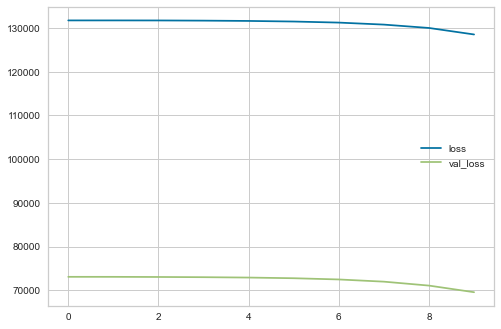

In [33]:
loss = pd.DataFrame(history.history)
loss.plot();

In [34]:
tahmin = model.predict(x_test)
r2_score(tahmin, y_true) * 100

1/1 [==============================] - 0s 138ms/step


-829228.7006324587